In [19]:
import pandas as pd

passes = pd.read_csv("fbref/EPLPass1920.csv",header=[0,1])
new_cols = []

for col in passes.columns:
    if "Unnamed:" in col[0]:
        new_cols.append(col[1])
    else:
        new_cols.append(col[0] + " " + col[1])
passes.columns = new_cols
passes["Player"] = passes["Player"].apply(lambda x: x.split("\\")[0])
passes["Nation"] = passes["Nation"].apply(lambda x: x.split(" ")[1])

In [46]:
# print(passes)
passes["xAcon"] = (passes["Ast"]) / passes["xA"]
passes["xApShot"] = passes["xA"] / (passes["Ast"] + passes["KP"])
passes["xA90"] = passes["xA"] / passes["90s"]
passes["PPA90"] = passes["PPA"] / passes["90s"]
new_passes = passes.dropna()[(passes["Ast"]>=1) & (passes["xA"]>=1) & (passes["KP"]>=10)
& (passes["Pos"].str.contains("MF",regex=False)) & (passes["90s"]>=8)]
print(new_passes.sort_values(by=["PPA90"],ascending=False)[["Player","90s","Age","xA90","xApShot","PPA","PPA90"]].head(50))

                Player   90s   Age      xA90   xApShot  PPA     PPA90
104    Kevin De Bruyne  30.0  28.0  0.560000  0.123529  112  3.733333
424        David Silva  19.4  33.0  0.273196  0.096364   62  3.195876
277       Riyad Mahrez  21.1  28.0  0.436019  0.139394   67  3.175355
367         Paul Pogba  11.4  26.0  0.228070  0.089655   26  2.280702
8      Marc Albrighton   8.8  29.0  0.204545  0.085714   20  2.272727
173      Jack Grealish  34.9  23.0  0.186246  0.069149   75  2.148997
291          Juan Mata   8.4  31.0  0.250000  0.100000   18  2.142857
65         Emi Buendía  27.4  22.0  0.273723  0.087209   58  2.116788
513      Wilfried Zaha  35.4  26.0  0.098870  0.089744   74  2.090395
17     Felipe Anderson  16.6  26.0  0.174699  0.096667   33  1.987952
136    Bruno Fernandes  11.2  24.0  0.214286  0.064865   22  1.964286
176        Pascal Groß  20.0  28.0  0.270000  0.081818   37  1.850000
423     Bernardo Silva  22.5  24.0  0.235556  0.098148   41  1.822222
49             Berna

C:\Users\ducnm\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [36]:
new_passes = passes.dropna()[(passes["Squad"]=="Arsenal")]
print(new_passes[(new_passes["xA"]>0)].sort_values(by=["xApShot"],ascending=False)
      [["Player","Age","xA","Ast","KP","xApShot","xAcon"]])

                        Player   Age   xA  Ast  KP   xApShot     xAcon
461             Kieran Tierney  22.0  1.0    0   5  0.200000  0.000000
353  Sokratis Papastathopoulos  31.0  0.2    0   1  0.200000  0.000000
271                 David Luiz  32.0  1.0    1   4  0.200000  1.000000
41             Héctor Bellerín  24.0  0.4    0   2  0.200000  0.000000
80              Calum Chambers  24.0  0.8    1   4  0.160000  1.250000
278     Ainsley Maitland-Niles  21.0  1.5    2   9  0.136364  1.333333
403                Bukayo Saka  17.0  3.3    5  21  0.126923  1.515152
25   Pierre-Emerick Aubameyang  30.0  2.8    2  22  0.116667  0.714286
243        Alexandre Lacazette  28.0  2.9    4  22  0.111538  1.379310
340              Eddie Nketiah  20.0  0.4    0   4  0.100000  0.000000
287                 Martinelli  18.0  0.2    0   2  0.100000  0.000000
316         Henrikh Mkhitaryan  30.0  0.2    0   2  0.100000  0.000000
317              Nacho Monreal  33.0  0.3    0   3  0.100000  0.000000
358   

C:\Users\ducnm\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [162]:
print(new_passes[new_passes["Squad"].str.contains("Manchester Utd",regex=False)][["Player","Age","xA","Ast","KP","xApShot","xAcon"]])

              Player  Age   xA  Ast    KP   xApShot     xAcon
135  Bruno Fernandes   24  1.7    5  22.0  0.062963  2.941176
148             Fred   26  2.8    0  37.0  0.075676  0.000000
287        Juan Mata   31  2.1    2  19.0  0.100000  0.952381
288    Nemanja Matić   30  1.1    2  15.0  0.064706  1.818182
355  Andreas Pereira   23  3.7    3  31.0  0.108824  0.810811
363       Paul Pogba   26  2.1    3  22.0  0.084000  1.428571


0.09960724505223971
1.0452897695146128
41.51239669421488


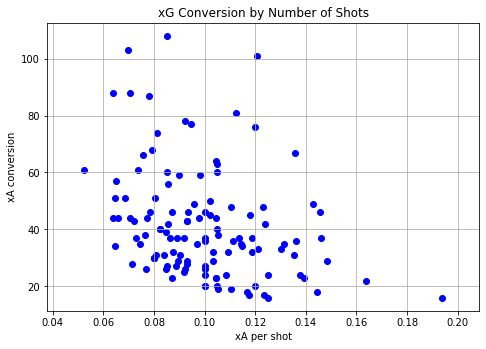

In [121]:
import matplotlib.pyplot as plt
import numpy as np

print(new_passes["xApShot"].mean())
print(new_passes["xAcon"].mean())
xA = new_passes["xA"].values
xAcon = new_passes["xAcon"].values
xApShot = new_passes["xApShot"].values
numShot = (new_passes["Ast"] + new_passes["KP"]).values
print(numShot.mean())
# npxG = new_passes["npxG"]
# print(npxGpSh.max())
# print(npxGcon.max())

fig=plt.figure()
fig.set_facecolor("white")
ax=fig.add_axes([0,0,1,1])
# ax.set_yticks(np.arange(0,20,2))
ax.scatter(xApShot, numShot, color='b')
ax.set_xlabel('xA per shot')
ax.set_ylabel('xA conversion')
ax.set_title('xG Conversion by Number of Shots')
plt.grid(True)
# z = np.polyfit(npxG, npG, 1)
# p = np.poly1d(z)
# plt.plot(npxG,p(npxG),"r-")
plt.show()

In [133]:
new_passes["display"] = False
new_passes["display"] = np.where(new_passes["Ast"] + new_passes["KP"] >=60,True,new_passes["display"])
# new_passes["display"] = np.where(new_passes["Ast"] + new_passes["KP"] <=10,True,new_passes["display"])
# new_passes["display"] = np.where(new_passes["xApShot"] <=0.07,True,new_passes["display"])
new_passes["display"] = np.where(new_passes["xApShot"] >=0.14,True,new_passes["display"])
# new_passes["display"] = np.where(new_passes["Squad"] =="Arsenal",True,new_passes["display"])
new_passes["display"] = np.where((new_passes["xApShot"] >=0.12) & (new_passes["Ast"] + new_passes["KP"] >=40),True,new_passes["display"])
players = np.where(new_passes["display"], new_passes["Player"].values,"")
# print(new_passes["display"])
# dis = new_passes["display"].values

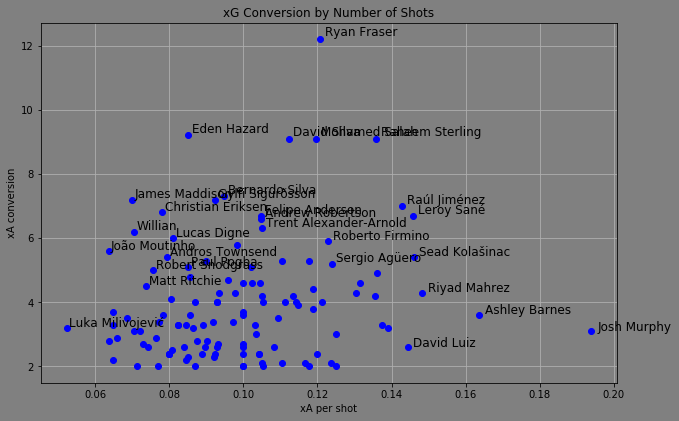

In [141]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_axes([0,0,1,1])
fig.set_facecolor("grey")
ax.set_xlabel('xA per shot')
ax.set_ylabel('xA conversion')
ax.set_title('xG Conversion by Number of Shots')
# players = new_passes["Player"].values
# plt.hlines(y=40,xmin=0.05,xmax=0.2,colors="white")
# plt.vlines(x=0.1,ymin=10,ymax=130,colors="white")
plt.grid(True)
ax.set_facecolor("grey")
for i in range(len(new_passes)):
    x = xApShot[i]
    y = xA[i]
    plt.plot(x, y, 'bo')
    plt.text(x * (1 + 0.01), y * (1 + 0.01) , players[i], fontsize=12)

In [3]:
print(passes)

      Rk                Player Nation   Pos            Squad   Age    Born  \
0      1   Patrick van Aanholt    NED    DF   Crystal Palace  28.0  1990.0   
1      2            Max Aarons    ENG    DF     Norwich City  19.0  2000.0   
2      3         Tammy Abraham    ENG    FW          Chelsea  21.0  1997.0   
3      4             Che Adams    ENG    FW      Southampton  23.0  1996.0   
4      5                Adrián    ESP    GK        Liverpool  32.0  1987.0   
..   ...                   ...    ...   ...              ...   ...     ...   
513  514         Wilfried Zaha    CIV  MFFW   Crystal Palace  26.0  1992.0   
514  515  Christoph Zimmermann    GER    DF     Norwich City  26.0  1993.0   
515  516   Oleksandr Zinchenko    UKR    DF  Manchester City  22.0  1996.0   
516  517     Richairo Živković    NED  FWDF    Sheffield Utd  22.0  1996.0   
517  518            Kurt Zouma    FRA    DF          Chelsea  24.0  1994.0   

      90s  Total Cmp  Total Att  ...  Long Cmp%   Ast    xA  A-